In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from macrohet import visualise, colours
from tqdm.auto import tqdm
import os
import warnings
import glob
import napari
import imageio
import numpy as np
from PIL import Image
from pathlib import Path


# Set up the visual style and palette
sns.set_theme(style='white', font='Nimbus Sans')
palette = colours.expanded_piyg

In [4]:
# load the df
# df = pd.read_pickle(r'\\10.1.90.27\opera2\Nathan\macrohet_syno\results/dfs/dt_df.pkl')
df = pd.read_pickle(r'/mnt/SYNO/macrohet_syno/results/dfs/dt_df.pkl')
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,y,...,dt_8,dmtb_8,dt_9,dmtb_9,dt_10,dt_11,dmtb_10,dmtb_11,Frame,Strain/Compound
0,0.0,0.424621,-0.424621,459.082108,-92.746118,1.0,1.0,0.0,457.172943,8.791715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,RD1
1,1.0,0.000000,-0.424621,372.839393,-92.746118,0.0,1.0,0.0,459.138947,6.718642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,RD1
2,2.0,0.000000,-0.424621,423.168130,-92.746118,0.0,1.0,0.0,460.555237,10.785886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,RD1
3,3.0,0.335227,-0.424621,445.561289,-92.746118,1.0,1.0,0.0,455.878815,11.143067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,RD1
4,4.0,0.000000,-0.424621,487.040034,-92.746118,1.0,1.0,0.0,462.634186,14.050420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722130,74.5,1.117423,1.095075,752.584461,55.088959,1.0,1.0,1.0,227.093262,130.358139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,149.0,RD1
1722131,75.0,2.033710,1.095075,616.035357,55.088959,1.0,1.0,1.0,226.622925,130.532120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,RD1
1722132,75.5,1.430302,1.095075,579.182743,55.088959,1.0,1.0,1.0,225.366608,129.932709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.0,RD1
1722133,76.0,1.989013,1.095075,679.147414,55.088959,1.0,1.0,1.0,226.424683,128.489410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152.0,RD1


# Ensure we have a dataframe of quick growers that have a high r2 (leaving rd1 for now) initially uninfected to see how many of those are uptake/transfer

In [17]:
### going off of previous calculation
fast_grower_dt_threshold = 15

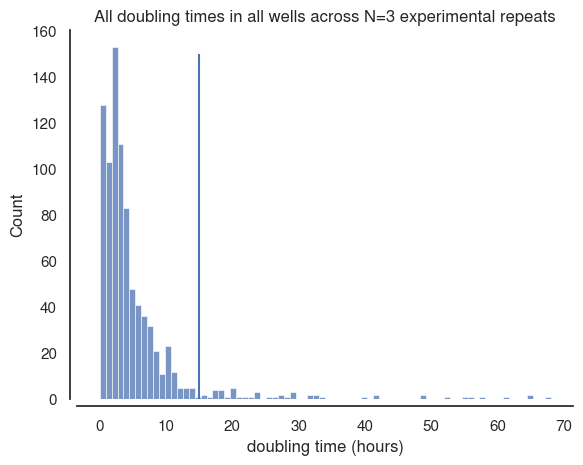

In [16]:
subset_df = df.drop_duplicates(subset=['ID'])
subset_df = subset_df[subset_df['dt']>=0]
subset_df = subset_df[subset_df['r2']>=0.7]
subset_df = subset_df[subset_df['Initial Infection Status']==0]
subset_df = subset_df[(subset_df['Strain'] == 'WT')]
sns.histplot(subset_df['dt'])
plt.xlabel('doubling time (hours)')
sns.despine(offset = 5)
title = 'All doubling times in all wells across N=3 experimental repeats'
plt.title(title)
plt.vlines(x = fast_grower_dt_threshold, ymin = 0, ymax = 150)
fn = f"{title.replace(' ', '_')}.png"

In [18]:
rapid_growers = subset_df[subset_df['dt'] < fast_grower_dt_threshold]

In [19]:
rapid_growers[['ID', 'dt', 'r2', 'Initial Infection Status']]

,ID,dt,r2,Initial Infection Status
13363,421.3.5.PS0000,2.857143,0.981019,0.0
14259,466.3.5.PS0000,3.888889,0.977124,0.0
14632,444.3.5.PS0000,3.333333,1.0,0.0
15980,374.3.5.PS0000,7.5,0.960513,0.0
16279,360.3.5.PS0000,0.5,1.0,0.0
...,...,...,...,...
1502138,1954.4.12.ND0003,1.333333,0.74412,0.0
1503049,2062.4.12.ND0003,0.0,0.881024,0.0
1503652,2218.4.12.ND0003,2.5,1.0,0.0
1506532,2671.4.12.ND0003,1.5,0.770909,0.0


# Checking if we have the glimpses and graphs for these

In [27]:
missing_mp4s  = []
# missing_both_mp4s = []
missing_graphs = []

new_glimpse_dir = '/mnt/SYNO/macrohet_syno/results/glimpse_dt_graphs/glimpses/'
# old_glimpse_dirs = '/mnt/SYNO/macrohet_syno/results/june24/*_glimpse_matches/'
graphs_dirs = '/mnt/SYNO/macrohet_syno/results/glimpse_dt_graphs/graphs/'

for row, data in tqdm(rapid_growers.iterrows(), total=len(rapid_growers)):
    mp4_fn = glob.glob(os.path.join(new_glimpse_dir, f'*{data.ID}*.mp4'))
    graph_fn = glob.glob(os.path.join(graphs_dirs, f'*{data.ID}*.png'))

    if mp4_fn == []:
        missing_mp4s.append(data.ID)
        # mp4_fn = glob.glob(os.path.join(old_glimpse_dirs, f'*{data.ID}.mp4'))
        # if mp4_fn == []:
        #     print(f'no old mp4 found for {data.ID}')
        #     missing_both_mp4s.append(data.ID)
    if graph_fn == []:
        missing_graphs.append(data.ID)

  0%|          | 0/818 [00:00<?, ?it/s]

In [23]:
len(missing_both_mp4s), len(missing_new_mp4s)

(468, 469)

In [25]:
missing_new_mp4s

['283.3.5.ND0002',
 '741.3.5.ND0002',
 '778.3.5.ND0002',
 '977.3.5.ND0002',
 '1195.3.5.ND0002',
 '218.3.6.ND0002',
 '202.3.6.ND0002',
 '50.3.6.ND0002',
 '114.3.6.ND0002',
 '241.3.6.ND0002',
 '565.3.6.ND0002',
 '1039.3.6.ND0002',
 '1666.3.6.ND0002',
 '1715.3.6.ND0002',
 '152.3.7.ND0002',
 '336.3.7.ND0002',
 '572.3.7.ND0002',
 '1109.3.7.ND0002',
 '121.3.8.ND0002',
 '168.3.8.ND0002',
 '31.3.8.ND0002',
 '47.3.8.ND0002',
 '181.3.8.ND0002',
 '1412.3.8.ND0002',
 '160.3.9.ND0002',
 '162.3.9.ND0002',
 '37.3.9.ND0002',
 '77.3.9.ND0002',
 '72.3.9.ND0002',
 '451.3.9.ND0002',
 '940.3.9.ND0002',
 '86.3.10.ND0002',
 '112.3.10.ND0002',
 '103.3.10.ND0002',
 '46.3.10.ND0002',
 '148.3.10.ND0002',
 '342.3.10.ND0002',
 '44.3.11.ND0002',
 '761.3.11.ND0002',
 '491.3.12.ND0002',
 '51.4.3.ND0002',
 '121.4.3.ND0002',
 '378.4.3.ND0002',
 '647.4.3.ND0002',
 '1927.4.3.ND0002',
 '2557.4.3.ND0002',
 '148.4.4.ND0002',
 '265.4.4.ND0002',
 '129.4.4.ND0002',
 '396.4.4.ND0002',
 '738.4.4.ND0002',
 '964.4.4.ND0002',
 '145

In [24]:
len(missing_graphs)

585

In [26]:
%store missing_graphs

Stored 'missing_graphs' (list)


In [ ]:
compound = 'PZA' # 'RIF' ' INH' 'BDQ'

# Second subset for initially uninfected
initially_uninfected_df = df.drop_duplicates(subset=['ID'])
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['dt'] >= 0]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['r2'] >= 0.7]
initially_uninfected_df = initially_uninfected_df[initially_uninfected_df['Initial Infection Status'] == 0]
initially_uninfected_df = initially_uninfected_df[(initially_uninfected_df['Compound'] == compound) & (initially_uninfected_df['Strain'] == 'WT')]
rapid_growers = initially_uninfected_df[initially_uninfected_df['dt'] < fast_grower_dt_threshold]

In [ ]:
rapid_growers['mtb_origin'] = 'Unknown'
rapid_growers

In [ ]:
for row, data in tqdm(rapid_growers[['ID', 'dt', 'r2', 'Initial Infection Status']].iterrows(), total = len(rapid_growers)):
    mp4_fn = glob.glob(os.path.join(base_dir, f'*{data.ID}.mp4'))
    graph_fn = glob.glob(os.path.join(base_dir, f'*{data.ID}*.png'))
    
    if mp4_fn and graph_fn:
        mp4_fn = mp4_fn[0]
        graph_fn = graph_fn[0]
        
        # Load the mp4 and png files
        video = imageio.get_reader(mp4_fn, 'ffmpeg')
        img = imageio.imread(graph_fn)
        
        # Display in napari
        viewer = napari.Viewer()
        
        # Load video frames into a numpy array
        video_frames = np.array([frame for frame in video])

        # Resize the image to half its size
        img_resized = np.array(Image.fromarray(img).resize((img.shape[1] // 2, img.shape[0] // 2)))
        
        # Add video and image to napari viewer
        viewer.add_image(video_frames, name=f'{data.ID} Video', blending = 'additive')
        viewer.add_image(img_resized, name=f'{data.ID} Image')
        viewer.grid.enabled = True
        viewer.dims.current_step = (0, 374, 374)
        
        # Define key binding function
        def mark_transfer(viewer):
            rapid_growers.at[row, 'mtb_origin'] = 'Transfer'
            rapid_growers.to_csv(f'{output_dir}wt_{compound}_init_uninf_updated_rapid_growers.csv', index=False)
            print(f"ID {data.ID} marked as 'transfer' and DataFrame saved.")

        # Define key binding function
        def mark_uptake(viewer):
            rapid_growers.at[row, 'mtb_origin'] = 'Uptake'
            rapid_growers.to_csv(f'{output_dir}wt_{compound}_init_uninf_updated_rapid_growers.csv', index=False)
            print(f"ID {data.ID} marked as 'uptake' and DataFrame saved.")
        
        # Add key binding
        viewer.bind_key('t', mark_transfer)
        viewer.bind_key('u', mark_uptake)
        viewer.show(block=True)